In [1]:

import numpy as np
from matplotlib import pyplot as plt
from sklearn.svm import SVC
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 600


In [2]:
np.random.seed(2)
n_true = 20
x_true = np.random.normal(5, 1, n_true)
y_true = np.random.normal(6, 25, n_true)

n_false = 20
x_false = np.random.normal(4, 1, n_false)
y_false = np.random.normal(1, 25, n_false)

a = -5
b = 21.5

y_true = y_true + 4 * (a * x_true + b)
y_false = 4 * (- a * x_false + b) - y_false

_x = np.hstack([x_true, x_false])
_y = np.hstack([y_true, y_false])
_y -= np.min(_y)
_y /= np.max(_y)
_x /= np.max(_x) * 1.1
X = np.array(list(zip(_x, _y)))

y = np.hstack([np.ones(n_true), np.zeros(n_false)])

print(X.shape, y.shape)

(40, 2) (40,)


In [3]:
idx = np.where(y == 1)[0][0] 
print(idx)
print(X.shape, X[idx, :].shape,  np.array([X[idx] + np.array([0, -0.05])]).shape)
new_point = np.array([X[idx] + np.array([0.1, -0.05])])
X2 = np.vstack([X, new_point])
y2 = np.append(y, [0])

0
(40, 2) (2,) (1, 2)


In [4]:
def plot_distances(points, a, b, color="orange"):
    for point in points:
        px, py = point
        x0 = (a * py + px - a * b) / (1 + (a ** 2))
        y0 = (b + (a ** 2) * py + a * px) / (1 + (a ** 2))
        # y0 = (-x0 / a) + (px / a) + py
        sx, sy = [px, x0], [py, y0]
        idx = np.argsort(sx)
        plt.plot(
            np.linspace(*np.array(sx)[idx]),
            np.linspace(*np.array(sy)[idx]),
            color=color, linewidth=1,
            linestyle="--", scalex=False, scaley=False)


In [15]:

def plot_data_and_svm(model, __x, __y, title):
    plt.figure()
    all_idx = np.arange(__x.shape[0])
    support_mask = np.in1d(all_idx, model.support_)
    scatter = plt.scatter(__x[support_mask, 0], __x[support_mask, 1], c=__y[support_mask], cmap="coolwarm", edgecolors="yellow", linewidths=1, zorder=3)
    scatter = plt.scatter(__x[~support_mask, 0], __x[~support_mask, 1], c=__y[~support_mask], cmap="coolwarm", edgecolors="k", linewidths=0.5, zorder=2)
    # plot decision function
    x_min, x_max = np.min(__x[:, 0]), np.max(__x[:, 0])
    y_min, y_max = np.min(__x[:, 1]), np.max(__x[:, 1])
    r_xmin, r_xmax = x_min - 0.05, x_max + 0.05
    r_ymin, r_ymax = y_min - 0.05, y_max + 0.05

    if r_xmax - r_xmin > r_ymax - r_ymin:
        half_range = (r_xmax - r_xmin) / 2
        r_ymin, r_ymax = - half_range + (r_ymax + r_ymin) / 2, half_range + (r_ymax + r_ymin) / 2
    else:
        half_range = (r_ymax - r_ymin) / 2
        r_xmin, r_xmax = - half_range + (r_xmax + r_xmin) / 2, half_range + (r_xmax + r_xmin) / 2
    
    h = 0.01
    xx, yy = np.meshgrid(np.arange(r_xmin, r_xmax + h, h),
                         np.arange(r_ymin, r_ymax + h, h))
    Z = model.decision_function(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8, zorder=1)

    
    x_ls = np.linspace(r_xmin, r_xmax)
    coef = - model.coef_[0, 0] / model.coef_[0, 1]
    intercept = - model.intercept_[0] / model.coef_[0, 1]
    y_df = (x_ls * coef + intercept)
    plt.plot(x_ls, y_df, linewidth=2, color="k")

    # plot support vectors
    support_dec = model.decision_function(model.support_vectors_)

    # plot support lines
    support_bottom = y_df - 1 / model.coef_[0, 1]
    support_top = y_df + 1 / model.coef_[0, 1]
    plt.plot(x_ls, support_bottom, linestyle="--", c="k", linewidth=0.75, zorder=3)
    plt.plot(x_ls, support_top, linestyle="--", c="k", linewidth=0.75, zorder=3)

    # plot support points

    # plot non support point in gutter
    support_classes = __y[model.support_]
    supports = model.support_vectors_
    top = supports[(support_classes == 1) & (support_dec < 1.02)]
    bottom = supports[(support_classes == 0) & (support_dec > -1.02)]
    inter_bottom = intercept - 1 / model.coef_[0, 1]
    inter_top = intercept + 1 / model.coef_[0, 1]
    color = "yellow"
    plot_distances(top, coef, inter_top, color=color)
    plot_distances(bottom, coef, inter_bottom, color=color)
    # plt.scatter(supports[:, 0], supports[:, 1], marker="x", color=color, zorder=3, linewidths=1)
    
    plt.xlim(r_xmin, r_xmax)
    plt.ylim(r_ymin, r_ymax)
    plt.xlabel("$x_1$")
    plt.ylabel("$x_2$")
    plt.legend(*scatter.legend_elements())
    plt.title(title)
    plt.show()


[[ 0.90626116 -6.90283103]] (1, 2)
[3.10469612] (1,)
[-0.99968816 -1.00015553  0.99984406]


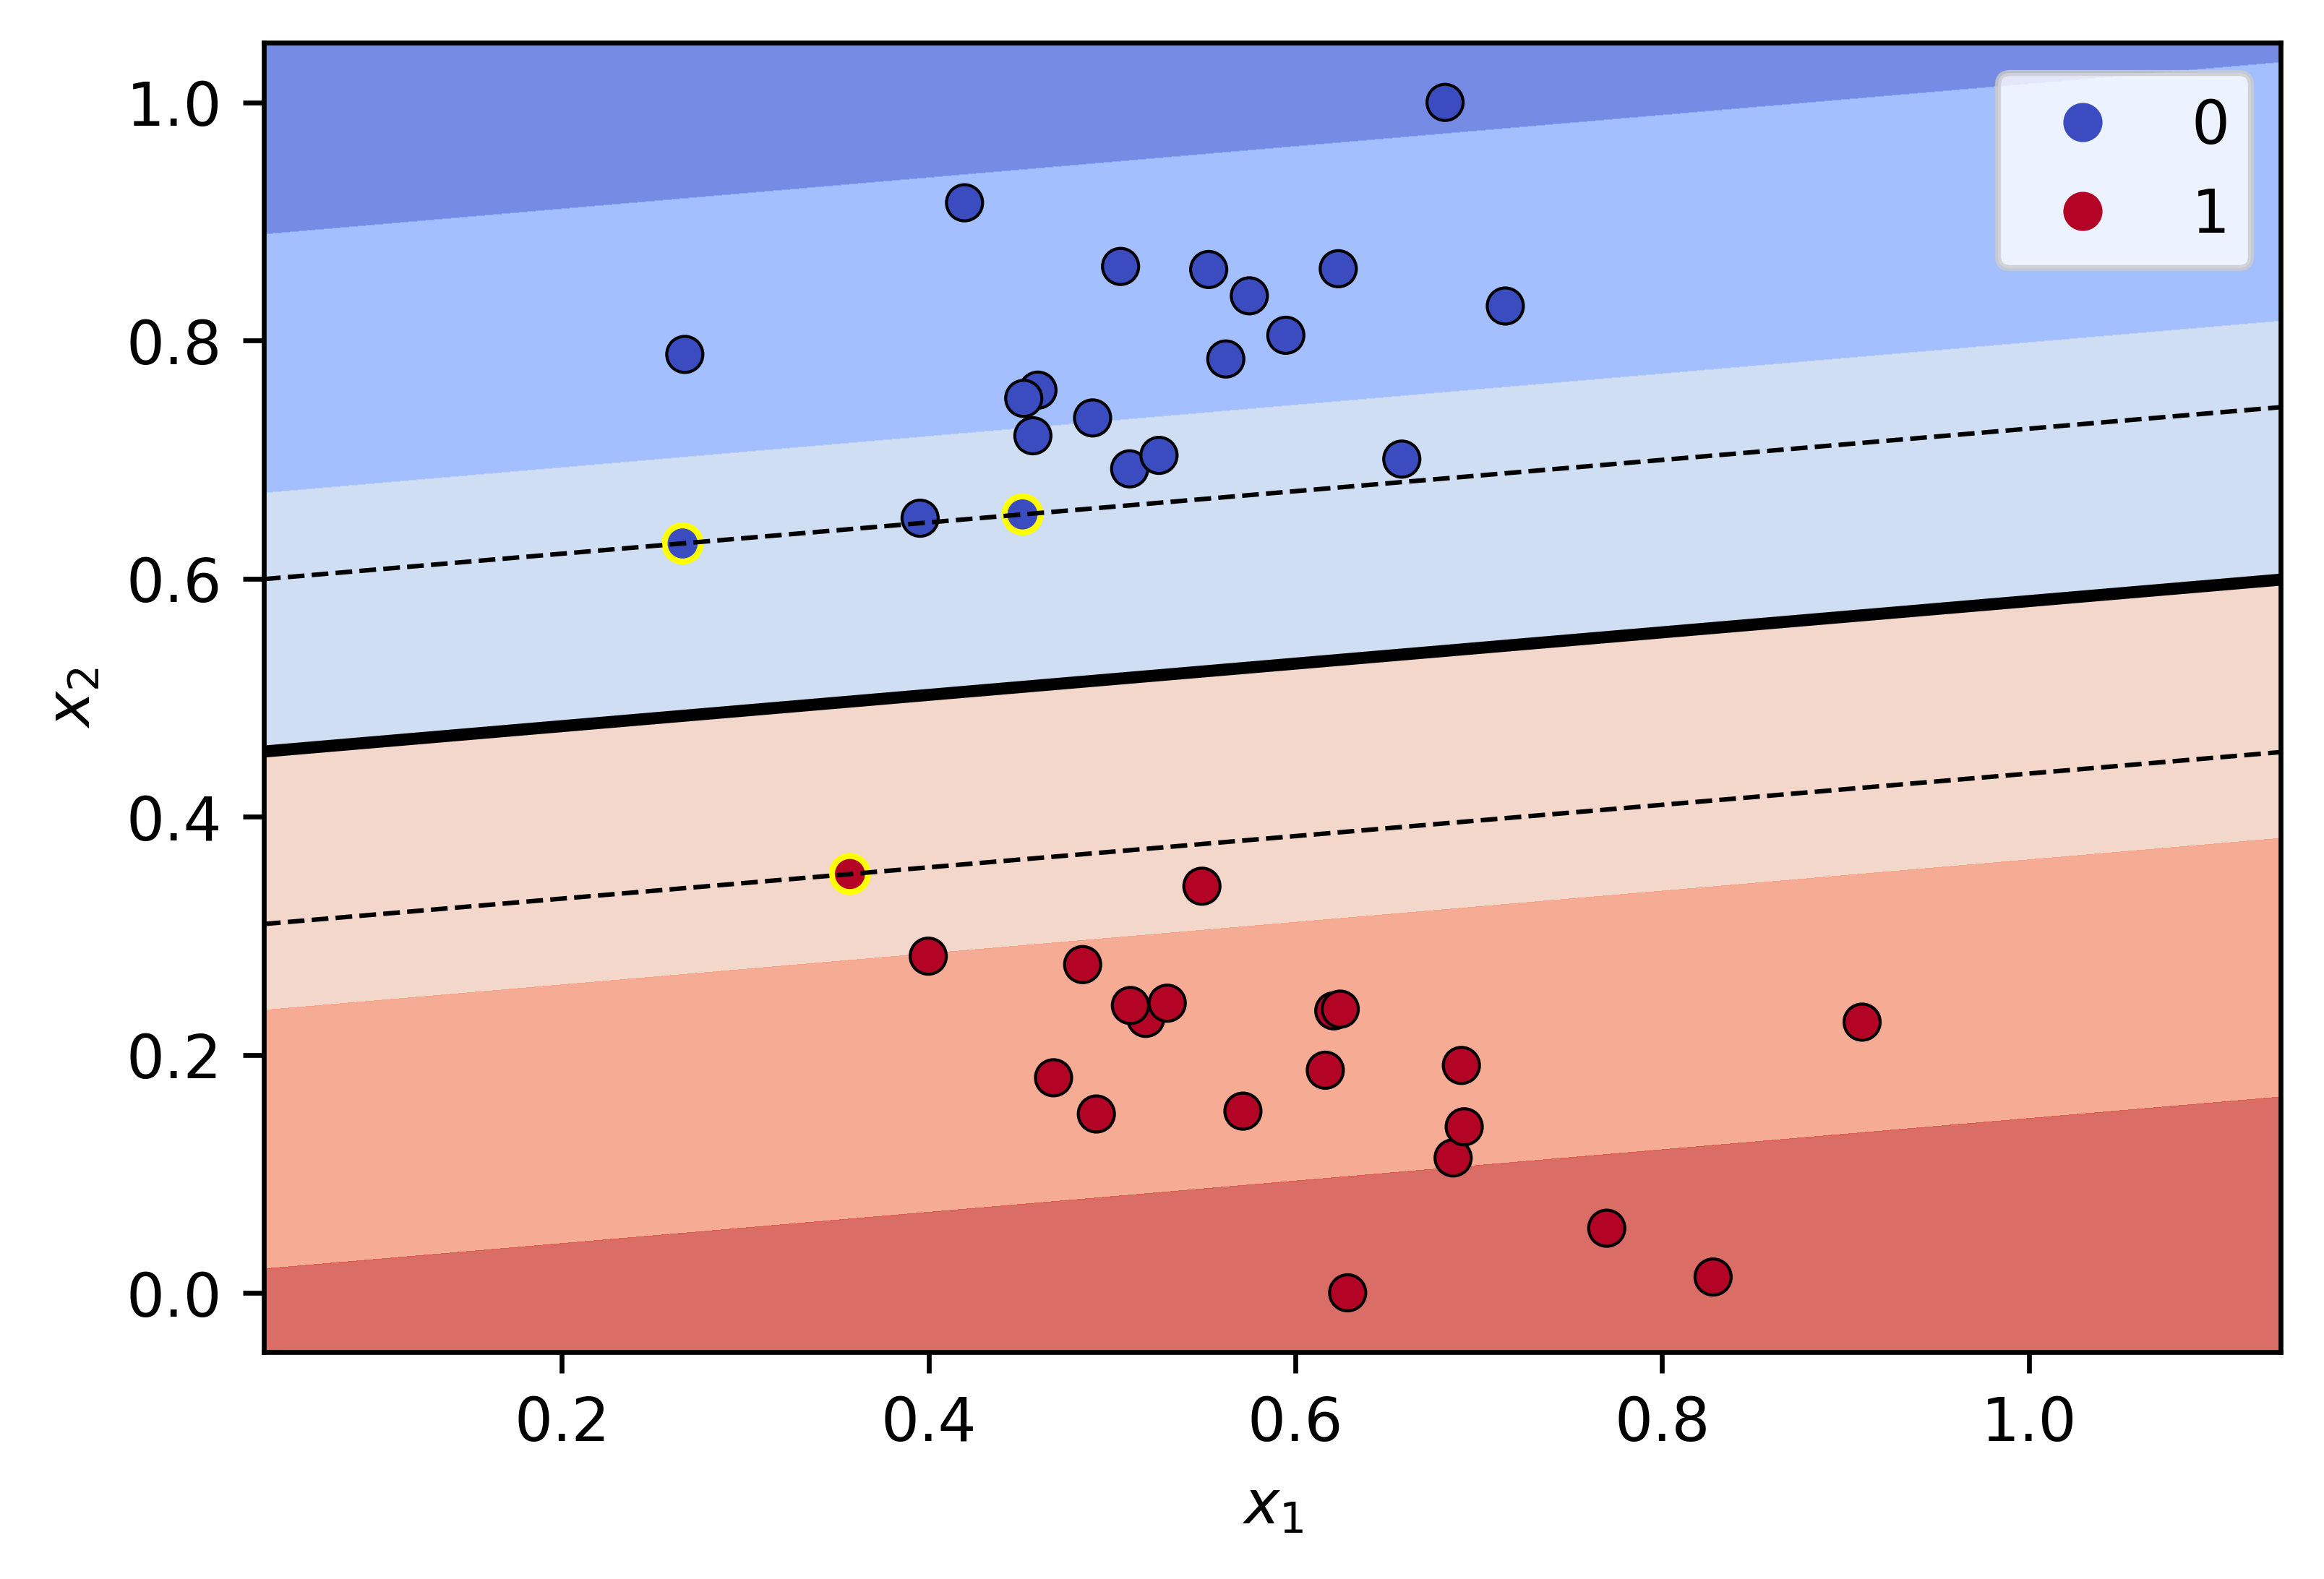

In [16]:
svm = SVC(kernel="linear", C=10000, random_state=42)
svm.fit(X, y)
print(svm.coef_, svm.coef_.shape)
print(svm.intercept_, svm.intercept_.shape)
print(svm.decision_function(svm.support_vectors_))
plot_data_and_svm(svm, X, y, "")

[[ 0.05485499 -4.4533536 ]] (1, 2)
[2.0544671] (1,)
[-0.73428517 -0.82163561 -1.00000001 -0.83280347  1.63432425  0.50736887
  0.81700513  0.85302512  0.56347332  1.00000008]


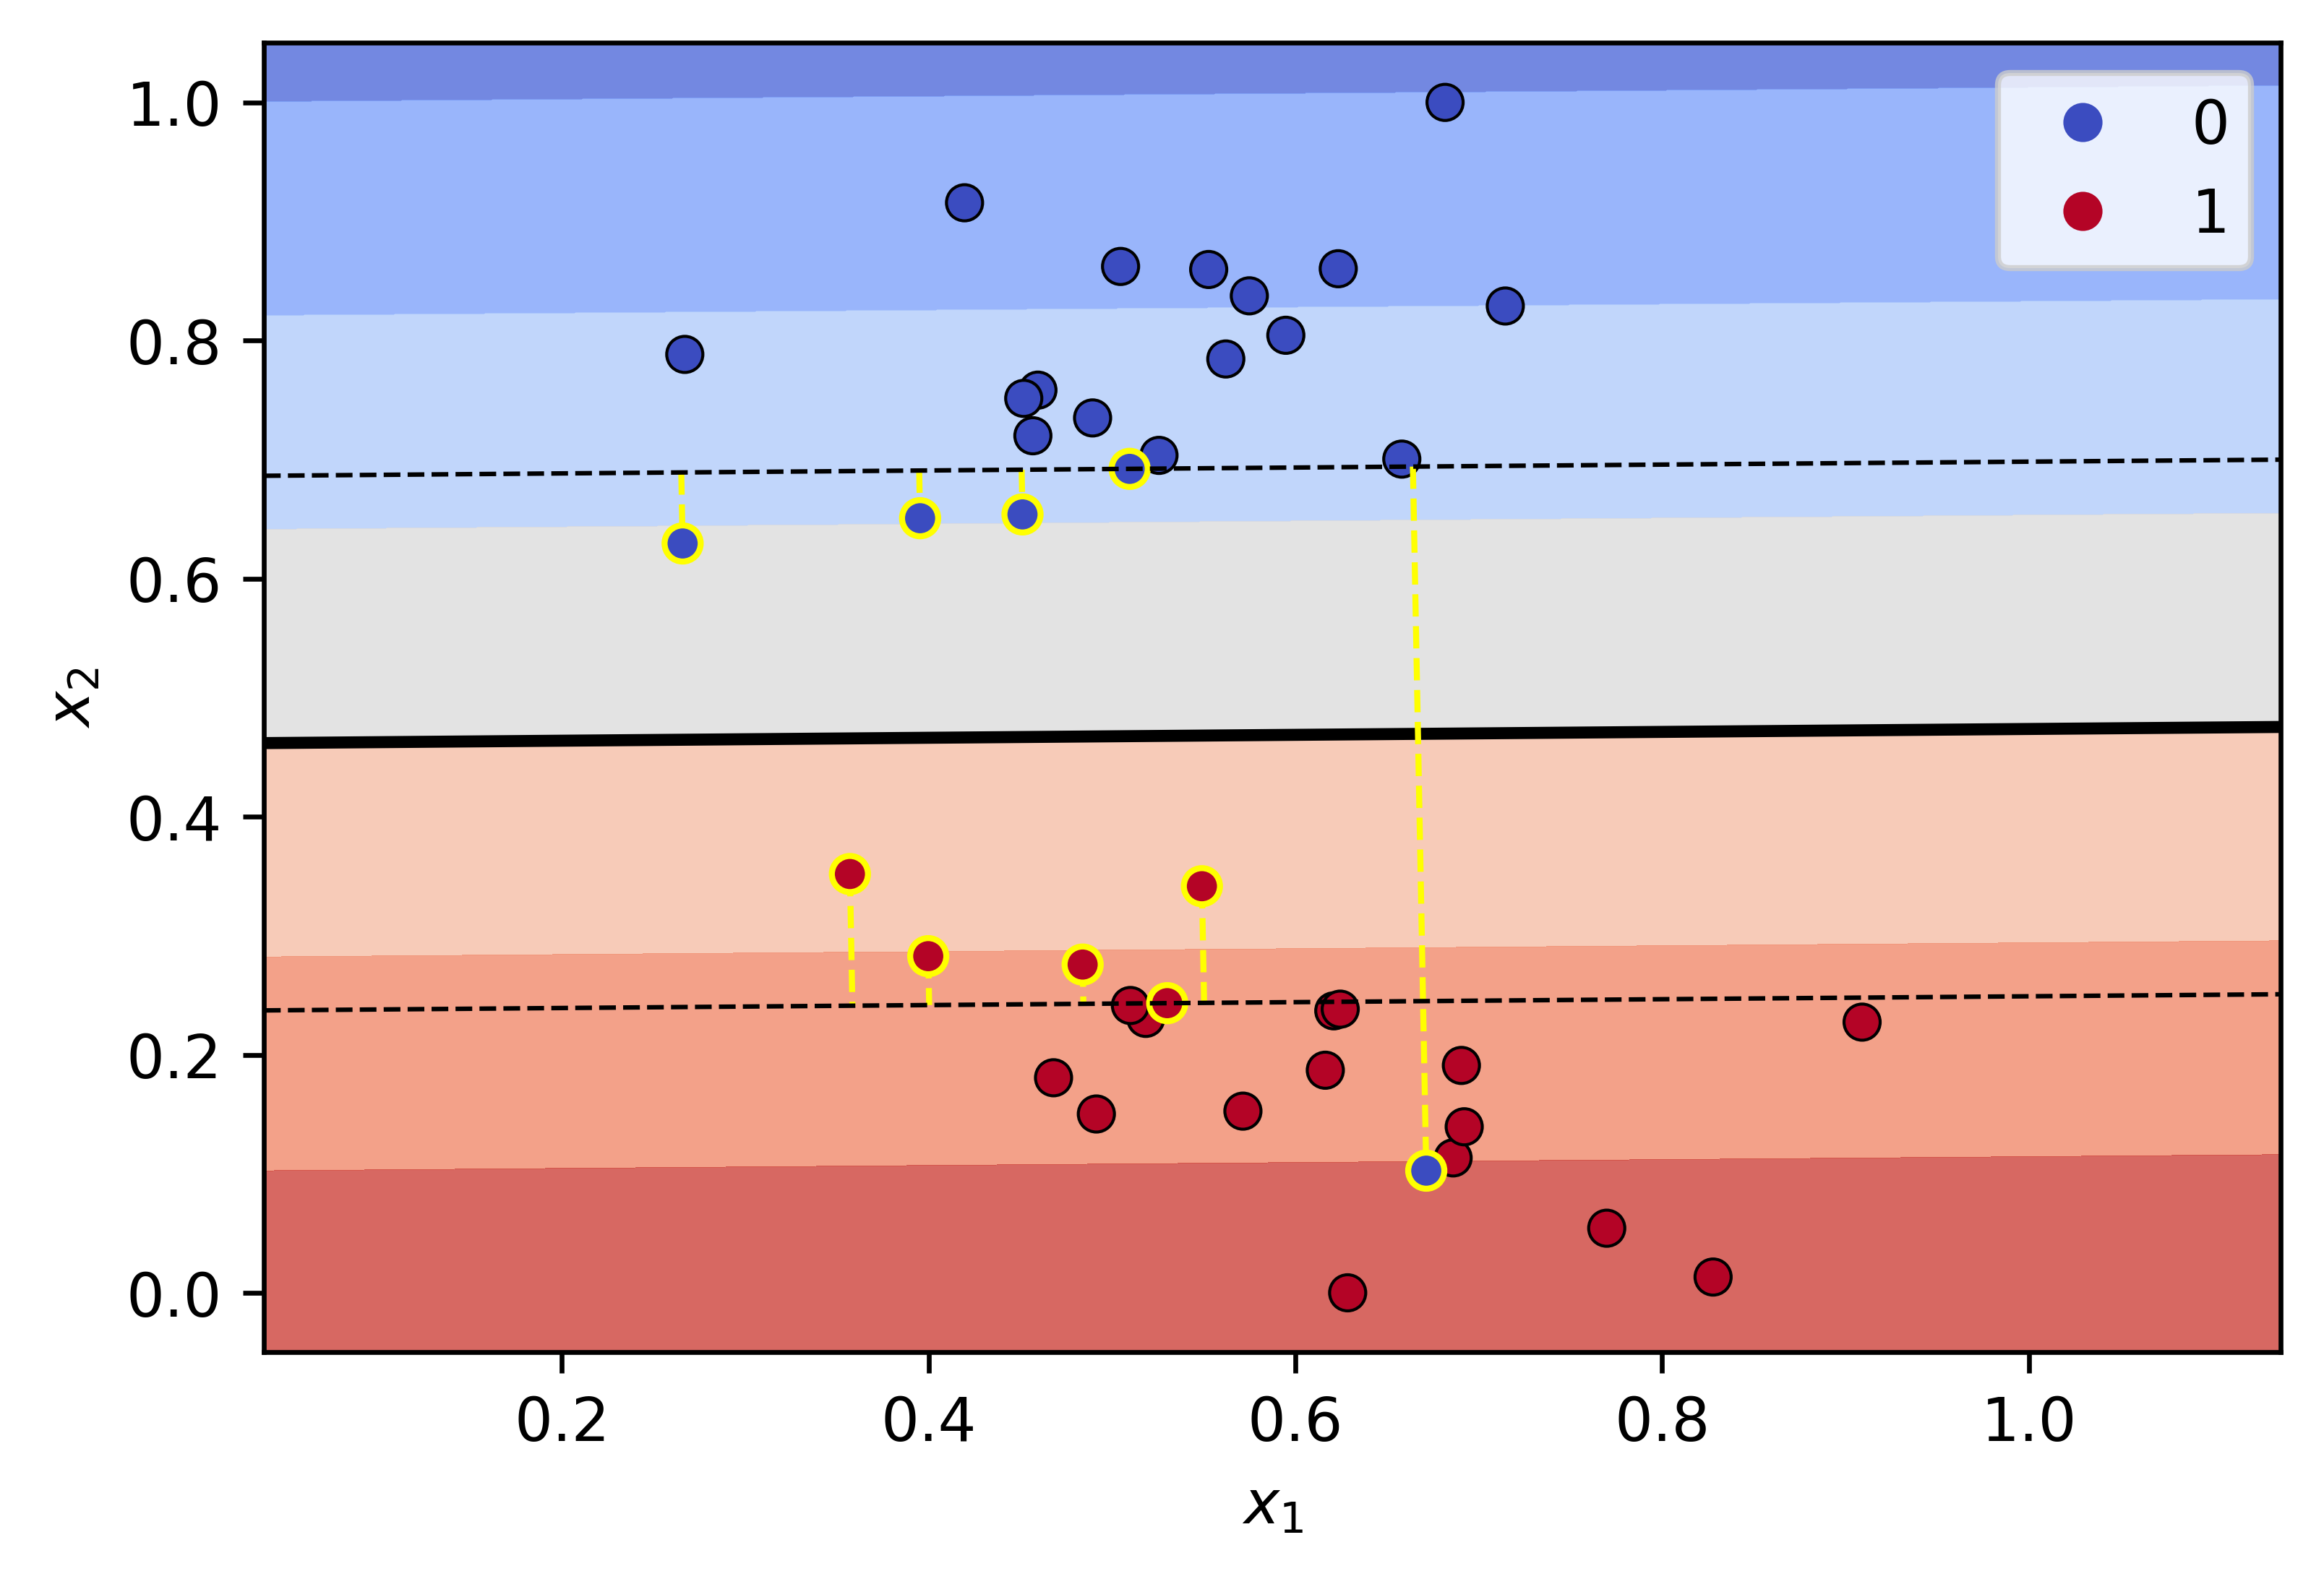

In [17]:
svm2 = SVC(kernel="linear", C=5, random_state=42)
svm2.fit(X2, y2)
print(svm2.coef_, svm2.coef_.shape)
print(svm2.intercept_, svm2.intercept_.shape)
print(svm2.decision_function(svm2.support_vectors_))
plot_data_and_svm(svm2, X2, y2, "")